In [14]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# prompt: from google.colab import drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# prompt: %cd

%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
!pip install openpyxl

In [5]:
#load data from the xlsx file
fileName ='Sample - Superstore.xls'
# Use pd.read_excel with the appropriate engine for .xls files
df_store = pd.read_excel(fileName, engine='xlrd')
# xlrd is suitable for older .xls files
df_store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Check general info
print(df_store.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
# Check the first 5 rows
print(df_store.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [8]:
# Count missing values per column
print(df_store.isnull().sum())


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
# Summary statistics for numerical columns
print(df_store.describe())


            Row ID                     Order Date  \
count  9994.000000                           9994   
mean   4997.500000  2016-04-30 00:07:12.259355648   
min       1.000000            2014-01-03 00:00:00   
25%    2499.250000            2015-05-23 00:00:00   
50%    4997.500000            2016-06-26 00:00:00   
75%    7495.750000            2017-05-14 00:00:00   
max    9994.000000            2017-12-30 00:00:00   
std    2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2016-05-03 23:06:58.571142912  55190.379428    229.858001     3.789574   
min              2014-01-07 00:00:00   1040.000000      0.444000     1.000000   
25%              2015-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2016-06-29 00:00:00  56430.500000     54.490000     3.000000   
75%              2017-05-18 00:00:00

In [10]:
# Group by Category and sum Sales
category_sales = df_store.groupby("Category")["Sales"].sum().reset_index()

# Sort and display top categories
category_sales = category_sales.sort_values(by="Sales", ascending=False)
print(category_sales.head(5))


          Category        Sales
2       Technology  836154.0330
0        Furniture  741999.7953
1  Office Supplies  719047.0320


In [11]:
# Group by Product Name and sum Profit
top_products = df_store.groupby("Product Name")["Profit"].sum().reset_index()

# Sort by Profit in descending order
top_products = top_products.sort_values(by="Profit", ascending=False)
print(top_products.head(10))


                                           Product Name      Profit
404               Canon imageCLASS 2200 Advanced Copier  25199.9280
650   Fellowes PB500 Electric Punch Plastic Comb Bin...   7753.0390
805                Hewlett Packard LaserJet 3310 Copier   6983.8836
400                  Canon PC1060 Personal Laser Copier   4570.9347
787   HP Designjet T520 Inkjet Large Format Printer ...   4094.9766
165                   Ativa V4110MDD Micro-Cut Shredder   3772.9461
19     3D Systems Cube Printer, 2nd Generation, Magenta   3717.9714
1276  Plantronics Savi W720 Multi-Device Wireless He...   3696.2820
895                Ibico EPK-21 Electric Binding System   3345.2823
1840                  Zebra ZM400 Thermal Label Printer   3343.5360


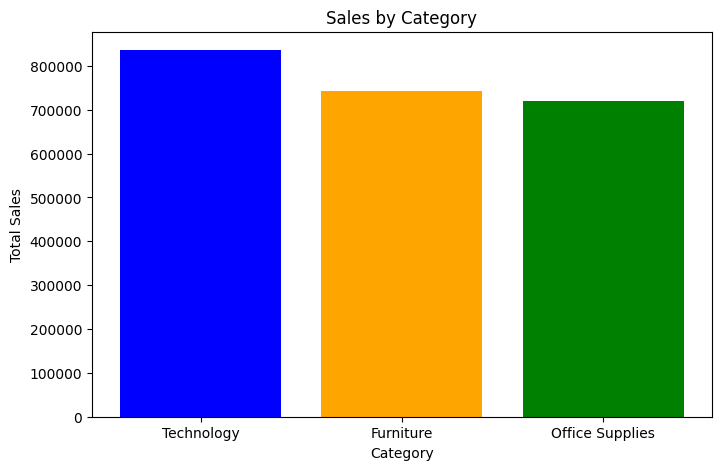

In [12]:
# Plot sales by category
plt.figure(figsize=(8, 5))
plt.bar(category_sales["Category"], category_sales["Sales"], color=["blue", "orange", "green"])
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Sales by Category")
plt.show()


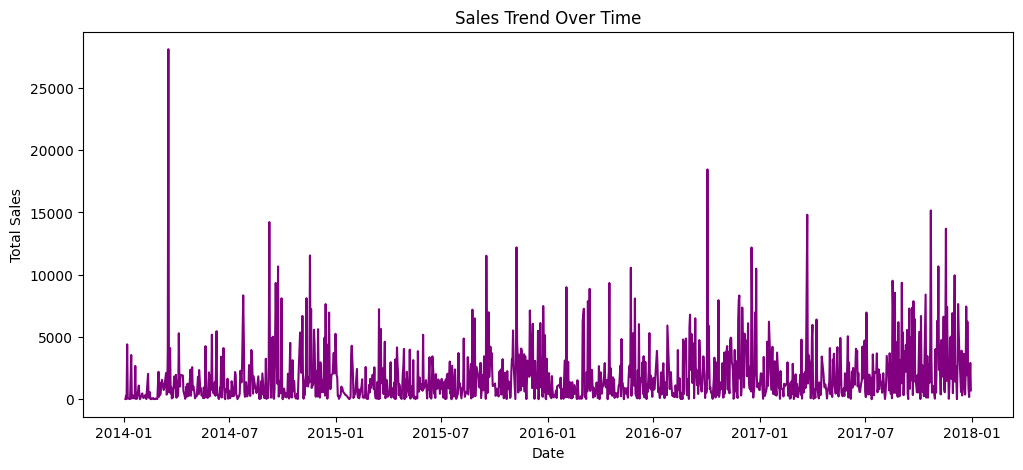

In [13]:
# Convert Order Date to datetime format
df_store["Order Date"] = pd.to_datetime(df_store["Order Date"])

# Group sales by date
sales_trend = df_store.groupby("Order Date")["Sales"].sum().reset_index()

# Plot sales over time
plt.figure(figsize=(12, 5))
plt.plot(sales_trend["Order Date"], sales_trend["Sales"], color="purple")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.show()


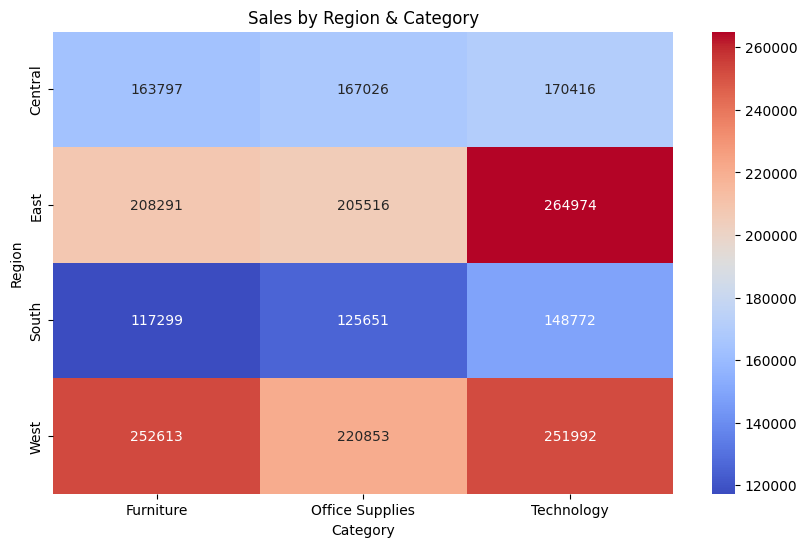

In [16]:
# Pivot the data for heatmap
heatmap_data = df_store.pivot_table(values="Sales", index="Region", columns="Category", aggfunc="sum")

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Sales by Region & Category")
plt.show()


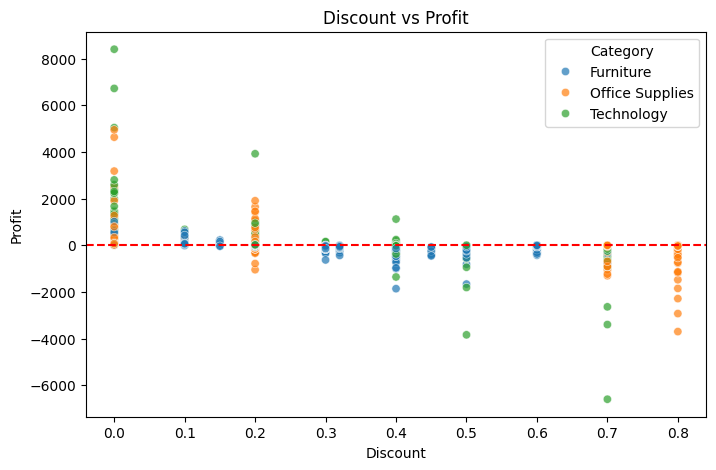

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_store, x="Discount", y="Profit", hue="Category", alpha=0.7)
plt.axhline(0, color="red", linestyle="--")  # Reference line at 0 profit
plt.title("Discount vs Profit")
plt.show()


<ipython-input-18-7806c07cddde>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_sorted["Product Name"][:15], rotation=90)


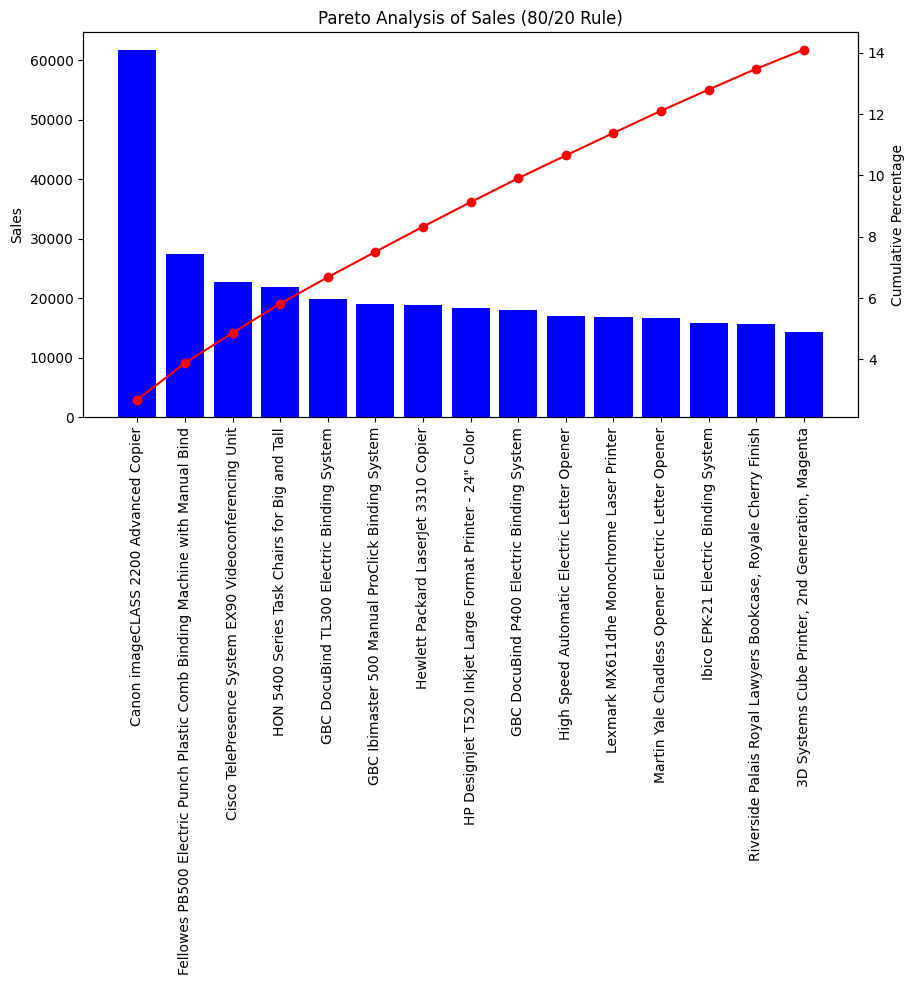

In [18]:
df_sorted = df_store.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).reset_index()
df_sorted["Cumulative %"] = df_sorted["Sales"].cumsum() / df_sorted["Sales"].sum() * 100

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df_sorted["Product Name"][:15], df_sorted["Sales"][:15], color="blue")
ax.set_xticklabels(df_sorted["Product Name"][:15], rotation=90)
ax.set_ylabel("Sales")
ax2 = ax.twinx()
ax2.plot(df_sorted["Product Name"][:15], df_sorted["Cumulative %"][:15], color="red", marker="o")
ax2.set_ylabel("Cumulative Percentage")
plt.title("Pareto Analysis of Sales (80/20 Rule)")
plt.show()


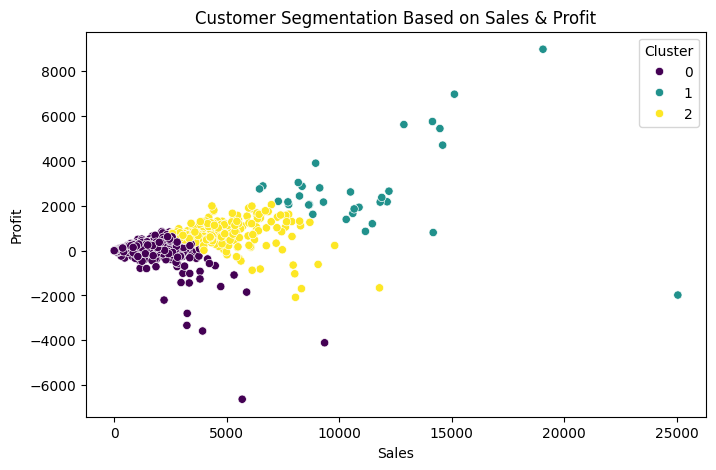

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features
customer_data = df_store.groupby("Customer Name")[["Sales", "Profit"]].sum()

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=customer_data, x="Sales", y="Profit", hue="Cluster", palette="viridis")
plt.title("Customer Segmentation Based on Sales & Profit")
plt.show()


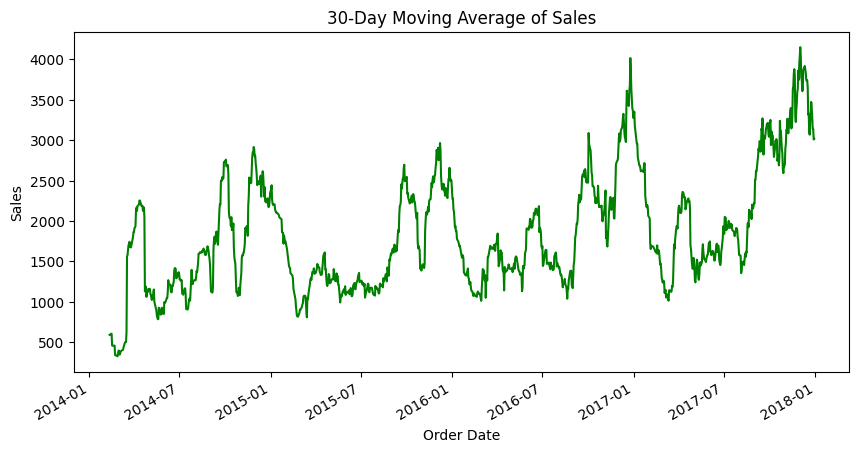

In [20]:
#Forecasting Future Sales
df_store["Order Date"] = pd.to_datetime(df_store["Order Date"])
sales_trend = df_store.groupby("Order Date")["Sales"].sum()

# Moving average
sales_trend.rolling(window=30).mean().plot(figsize=(10, 5), color="green")
plt.title("30-Day Moving Average of Sales")
plt.ylabel("Sales")
plt.show()
